<a href="https://www.kaggle.com/code/bishaladhikari07/notebook35902f866f?scriptVersionId=263671288" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


In [2]:
df=pd.read_csv("/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
df.tail()

,Unnamed: 0,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


### Data preprocessing

In [4]:
df.isna().sum()


Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [5]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [6]:
df.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [7]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [8]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


## Data Visualization

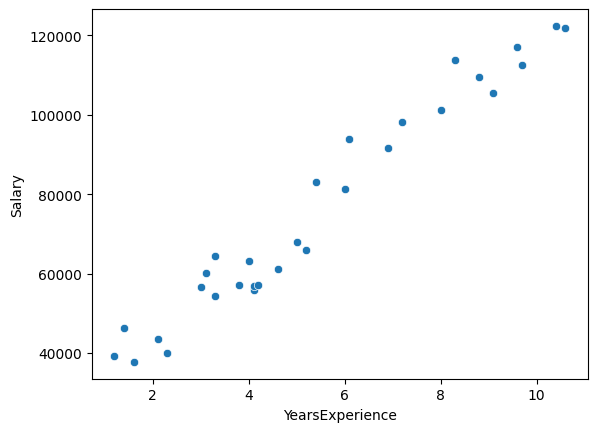

In [9]:
sns.scatterplot(x="YearsExperience", y="Salary", data=df)
plt.show()


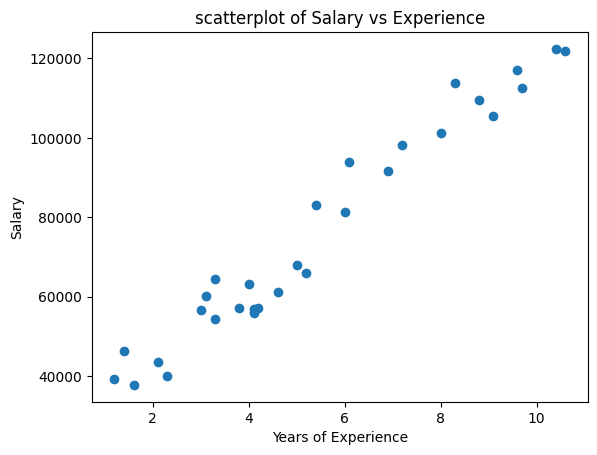

In [10]:
#for scatterplots
plt.scatter(df['YearsExperience'],df['Salary'])

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title("scatterplot of Salary vs Experience")
plt.show()





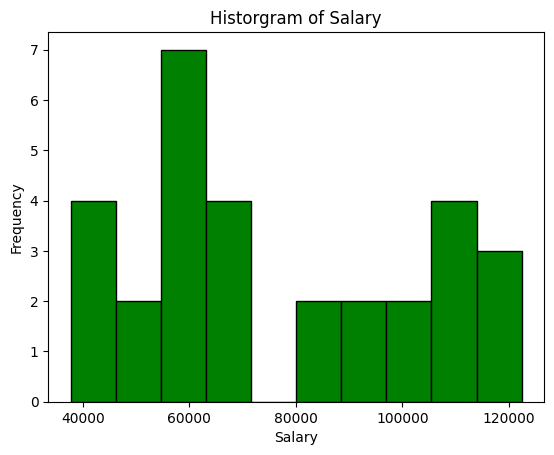

In [11]:
# histogram of salary
plt.hist(df["Salary"],bins=10,color="green",edgecolor="black")
plt.xlabel('Salary')
plt.ylabel("Frequency")
plt.title("Historgram of Salary")
plt.show()

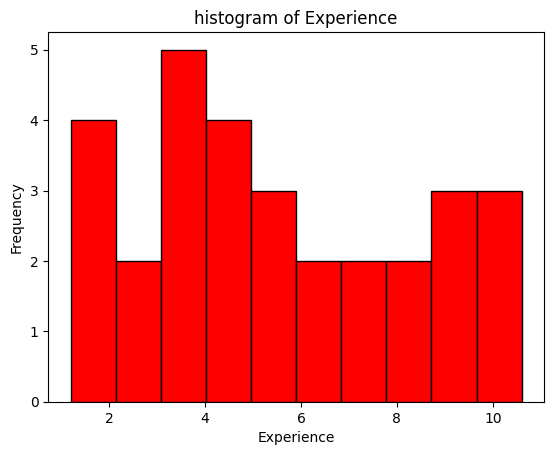

In [12]:
plt.hist(df['YearsExperience'],bins=10,color="red",edgecolor="black")
plt.ylabel("Frequency")
plt.xlabel("Experience")
plt.title("histogram of Experience")
plt.show()

In [13]:
x=df[['YearsExperience']]
y=df['Salary']

In [14]:
x.value_counts().sum()

30

In [15]:
y.value_counts().sum()

30

In [16]:
#model trainning 


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [17]:
x_test.value_counts().sum()

6

In [18]:
x_train.value_counts().sum()

24

In [19]:
y_train.value_counts().sum()

24

In [20]:
y_test.value_counts().sum()

6

In [21]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [22]:
y_preds=model.predict(x_test)

In [23]:
model.score(x_test,y_test)

0.9024461774180497

In [24]:
#r2 score
r2_score(y_test,y_preds)

0.9024461774180497

In [25]:
#mae
mean_absolute_error(y_test,y_preds)


6286.453830757745

In [26]:
#mse
mean_squared_error(y_test,y_preds)

49830096.855908394

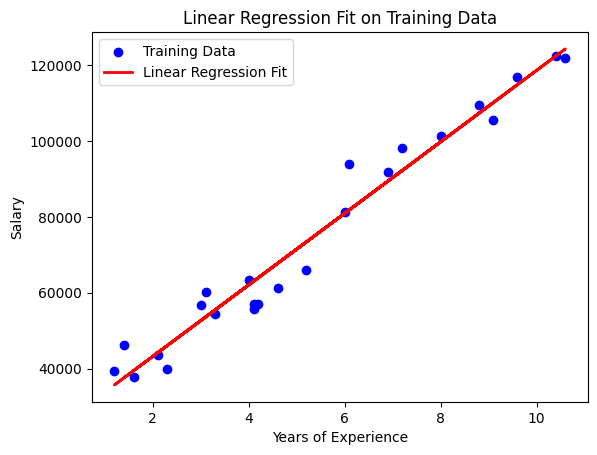

In [27]:
import matplotlib.pyplot as plt

# Scatter plot of actual data
plt.scatter(x_train, y_train, color='blue', label='Training Data')

# Regression line
plt.plot(x_train, model.predict(x_train), color='red', linewidth=2, label='Linear Regression Fit')

plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression Fit on Training Data")
plt.legend()
plt.show()


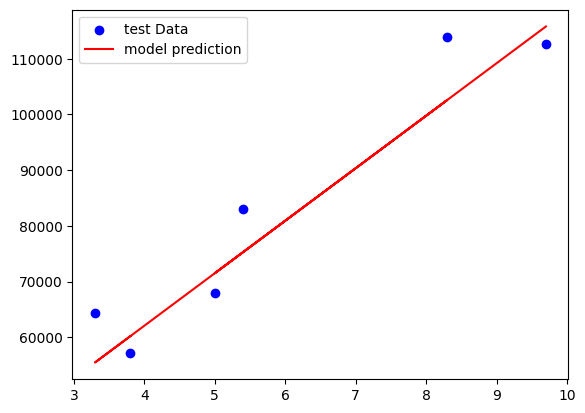

In [28]:
# for unseen data
# sorted_idx = x_test['YearsExperience'].argsort()

# x_test_sorted = x_test.iloc[sorted_idx]

# y_preds_sorted = y_preds[sorted_idx]
plt.scatter(x_test,y_test,color="blue",label="test Data")
plt.plot(x_test,y_preds,color="red",label="model prediction")
plt.legend()
plt.show()


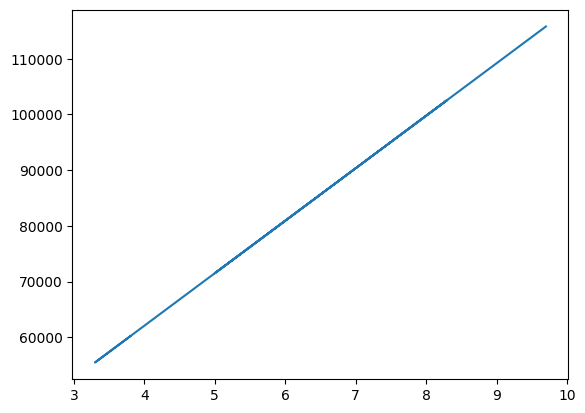

In [29]:
plt.plot(x_test, y_preds)
